In [1]:
%config Completer.use_jedi = False 

# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#데이터 추가 : Add data -> tab:Competition Data -> Titanic
test = pd.read_csv('../input/titanic/test.csv')
train = pd.read_csv('../input/titanic/train.csv')

In [3]:
#raw data print
#test
#train
#train.dtypes
#train.info()
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **컬럼정의**
*    Variable          정의                Key
*     survival          생존 여부            0 = No, 1 = Yes
*     pclass            선실 등급            1 = 1st, 2 = 2nd, 3 = 3rd
*     sex               성별    
*     Age               나이  
*     sibsp             형재 자매의 수/ 배우자 등이 승선한 경우 수    
*     parch             부모나 자식과 같이 탄 경우 수   
*     ticket            표 번호    
*     fare              요금
*     cabin             선실 번호   
*     embarked          승선한 항구         C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# 병합 준비 , line count
ntrain = train.shape[0]
ntest = test.shape[0]
print("train cnt : {} , test cnt : {} ".format(ntrain , ntest))

y_train = train['Survived'].values
passId = test['PassengerId']

#type check
y_train_type = type(y_train)
y_train_dtype = y_train.dtype
print("y_train : {} , {} " .format(y_train_type , y_train_dtype) )
passId_type = type(passId)
passId_dtype = passId.dtype
print("passId : {} , {} " .format(passId_type , passId_dtype) )


# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

data.head(n=10)

train cnt : 891 , test cnt : 418 
y_train : <class 'numpy.ndarray'> , int64 
passId : <class 'pandas.core.series.Series'> , int64 
data size is: (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#survived group by count
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

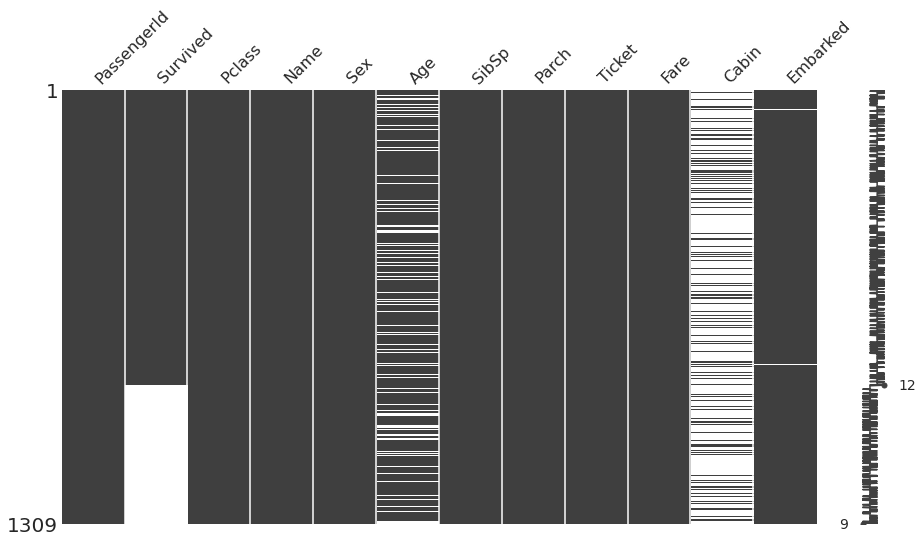

In [7]:
# 데이터 빈값 확인
missingno.matrix(data, figsize = (15,8))
data.isnull().sum() 

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.038354 -0.338481  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.077221 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224 -0.035322  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.081629  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.257307 -0.558629  0.178740  0.160238  0.221539   

                 Fare  
PassengerId  0.031428  
Survived     0.257307  
Pclass      -0.558629  
Age          0.178740  
SibSp        0.160238  
Parch        0.221539  
Fare         1.000000  
[[False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [F

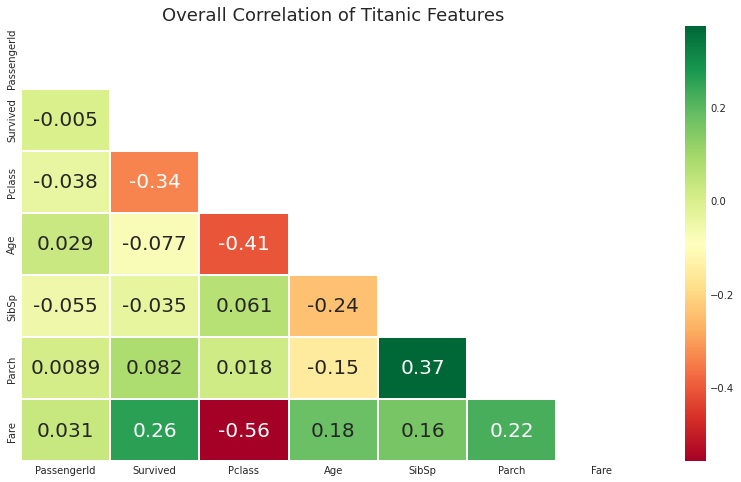

In [8]:
# Co-relation 매트릭스
corr = data.corr()
print(corr)

# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
print(mask)
mask[np.triu_indices_from(mask)] = True
print(mask)

# 그래프 셋업
plt.figure(figsize=(14, 8))

# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)

#  Co-relation 매트릭스 런칭
#sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
sns.heatmap(corr, mask=mask, annot=True,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

0    549
1    342
Name: Survived, dtype: int64


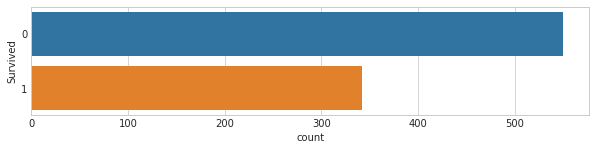

In [9]:
# Survived Column Check
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

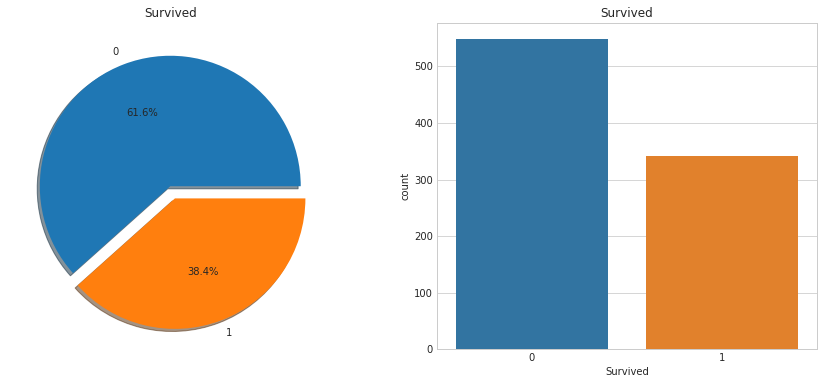

In [10]:
#1행2열 figsize 생성
f,ax=plt.subplots(1, 2, figsize=(15, 6))

#1,1에 Survived pie chart
# 0(die , Not Survived ) : 61.6% , 1(alive , Survived) : 38.4%
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#1,2에 Count chart
#0(die , Not Survived ) : 549 , 1(alive , Survived) : 342
#train['Survived'].value_counts()
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

#함수화
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

#piecount('Survived')


In [11]:
# train data 그룹화(Pclass , Survived) 후 값 카운팅
# value count in training data group by Pclass , Survived 
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')
#train.groupby(['Pclass','Survived'])['Survived'].count()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


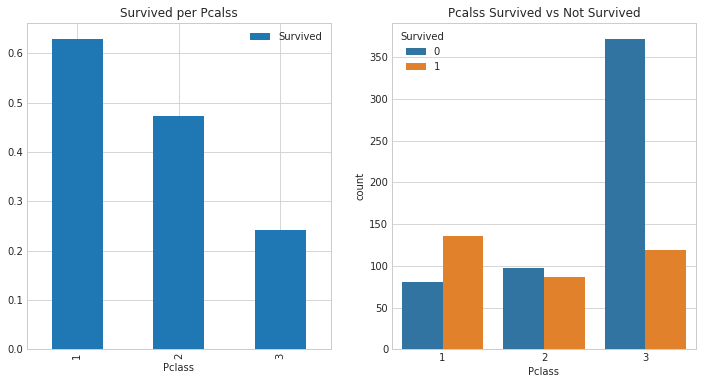

In [12]:
#1행2열 figsize 생성
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# train data 그룹화(Pclass , Survived) 후 값 평균
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')

# train data 그룹화(Pclass , Survived) 후 값 카운팅
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')

plt.show()

#생존자의 비율이 높은 곳은 Pclass : 1 
#사망자의 비율이 높은 곳은 Pclass : 3

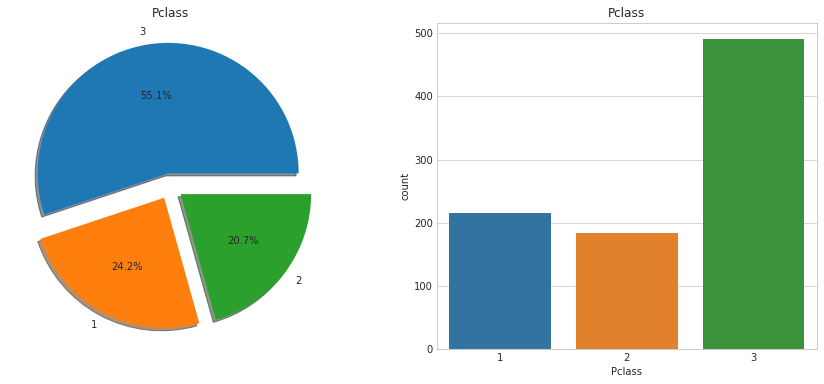

In [13]:
piecount("Pclass")
#좌석중 가장 높은 비율은 Pclass : 3 
#Pclass(1 ,2) 비율을 합쳐도 Pclass(3) 보다 작음

In [14]:
# 이름 종류별 카운팅
data.Name.value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

In [15]:
# 이름 이니셜 분류 #1
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Initial, dtype: int64

In [16]:
# 이름 이니셜 분류 #1 , 각 성별 이름 분류(first name) 수
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [17]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')
#Dona의 Survived = NaN
#Dona를 특정한 부분으로 분류할 필요가 있음

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [18]:
# 이름 분류 #2 , Lastname
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')
#temp.LastName.value_counts()

# 이름 분류 #2 , 각 성별 이름 분류(Lastname) 수
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')
#data.Name

LastName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff,Duran,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow,Moss,Moubarek,Moussa,Moutal,Mudd,Mullens,Murdlin,Murphy,Myhrman,Naidenoff,Najib,Nakid,Nankoff,Nasser,Natsch,Navratil,Nenkoff,Newell,Newsom,Nicholls,Nicholson,Nicola,Nilsson,Nirva,Niskanen,Norman,Nosworthy,Novel,Nye,Nysten,Nysveen,O,Odahl,Ohman,Olsen,Olsson,Olsvigen,Oreskovic,Osen,Osman,Ostby,Otter,Padro,Pain,Palsson,Panula,Parkes,Parr,Parrish,Partner,Pasic,Patchett,Paulner,Pavlovic,Pears,Peduzzi,Pekoniemi,Penasco,Pengelly,Perkin,Pernot,Perreault,Persson,Peter,Peters,Petranec,Petroff,Petterson,Pettersson,Peuchen,Phillips,Pickard,Pinsky,Plotcharsky,Ponesell,Porter,Potter,Quick,Radeff,Razi,Reed,Reeves,Rekic,Renouf,Reuchlin,Reynaldo,Rice,Richard,Richards,Ridsdale,Ringhini,Rintamaki,Risien,Robbins,Robert,Robins,Roebling,Rogers,Romaine,Rommetvedt,Rood,Rosblom,Ross,Rothes,Rothschild,Rouse,Rugg,Rush,Ryan,Ryerson,Saad,Saalfeld,Sadlier,Sage,Sagesser,Salkjelsvik,Salon

In [19]:
# 'Name' , 'Initial' , 'LastName' 확인
#temp[['Name' , 'Initial' , 'LastName' ]].head(n = 10)
temp[['Name' , 'Initial' , 'LastName' ]].tail(n = 10)

,Name,Initial,LastName
408,"Riordan, Miss. Johanna Hannah""""",Miss,Riordan
409,"Peacock, Miss. Treasteall",Miss,Peacock
410,"Naughton, Miss. Hannah",Miss,Naughton
411,"Minahan, Mrs. William Edward (Lillian E Thorpe)",Mrs,Minahan
412,"Henriksson, Miss. Jenny Lovisa",Miss,Henriksson
413,"Spector, Mr. Woolf",Mr,Spector
414,"Oliva y Ocana, Dona. Fermina",Dona,Oliva
415,"Saether, Mr. Simon Sivertsen",Mr,Saether
416,"Ware, Mr. Frederick",Mr,Ware
417,"Peter, Master. Michael J",Master,Peter


In [20]:
#Dona = NaN ...
#Dona 확인
temp.loc[temp['Initial'] == 'Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


In [21]:
#Dona의 나이 = 39
#Dona의 Nan -> Mrs
temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'

#Dona Check
temp.loc[temp['Name'] == 'Oliva y Ocana, Dona. Fermina']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Mrs,Oliva


In [22]:
#Dona Check 
survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [23]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [24]:
#LastName to Number
#temp['LastName'].factorize()
temp['NumName'] = temp['LastName'].factorize()[0]

In [25]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

NumName,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2,0,0,1,1,2,1,4,3,1,0,0,1,7,1,0,5,4,4,0,1,0,0,0,1,1,2,5,1,1,0,0,1,2,1,0,1,0,1,2,1,1,0,1,1,1,2,6,1,1,0,1,0,0,1,1,6,1,0,2,6,1,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,1,4,1,1,1,1,1,1,1,1,1,0,0,1,1,2,2,3,4,1,0,0,1,1,2,1,2,2,1,1,1,3,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,3,0,1,1,1,1,1,1,1,1,1,2,3,0,1,1,7,1,0,1,2,1,0,1,1,4,1,3,1,4,1,1,1,1,0,1,0,3,1,0,1,0,1,0,1,0,1,2,1,1,0,2,0,0,0,2,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,2,1,1,1,1,1,1,1,0,1,1,1,1,0,0,2,1,1,2,2,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,2,1,0,1,1,0,0,0,0,1,1,1,1,1,2,0,1,0,1,0,1,1,0,0,0,1,1,2,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,3,1,1,0,1,0,0,1,2,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,2,0,1,0,0,1,1,0,0,1,2,1,1,0,1,1,1,0,1,0,0,1,1,1,1,2,1,0,0,2,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,2,1,0,1,0,1,0,0,0,2,1,1,1,1,1,1,1,1,2,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,2,1,1,0,0,0,0,0,0,0,2,1,0

In [26]:
temp.loc[temp['LastName'] == 'Ali']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
210,211,0.0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S,Mr,Ali,182
784,785,0.0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S,Mr,Ali,182


In [27]:
train[['Sex' , 'Survived']].groupby(['Sex']).mean()
# 여성이 상대적으로 생존율이 높음

,Survived
Sex,
female,0.742038
male,0.188908


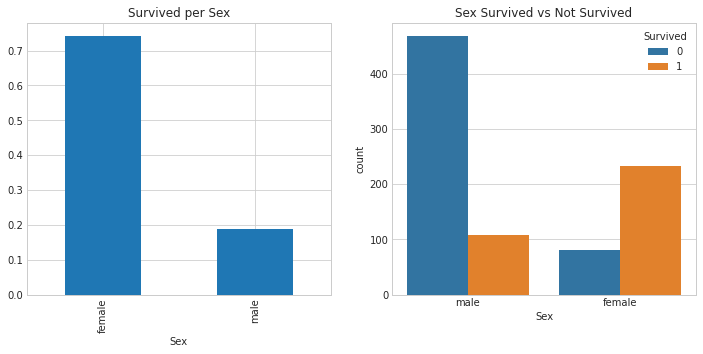

In [28]:
def bag(col, target, title, title1):
    f,ax=plt.subplots(1,2,figsize=(12,5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()

bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')
# 여성이 상대적으로 생존율이 높음
# 남성은 생존보다 사망율이 높음
# 여성은 사망모다 생존율이 높음

In [29]:
#pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).T.style.background_gradient(cmap='summer_r')
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [30]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


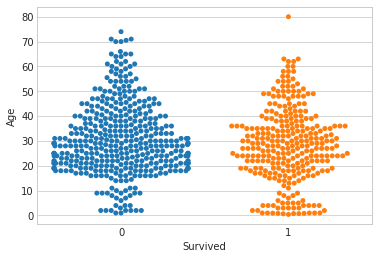

In [31]:
# Age 별 Survived 분포
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

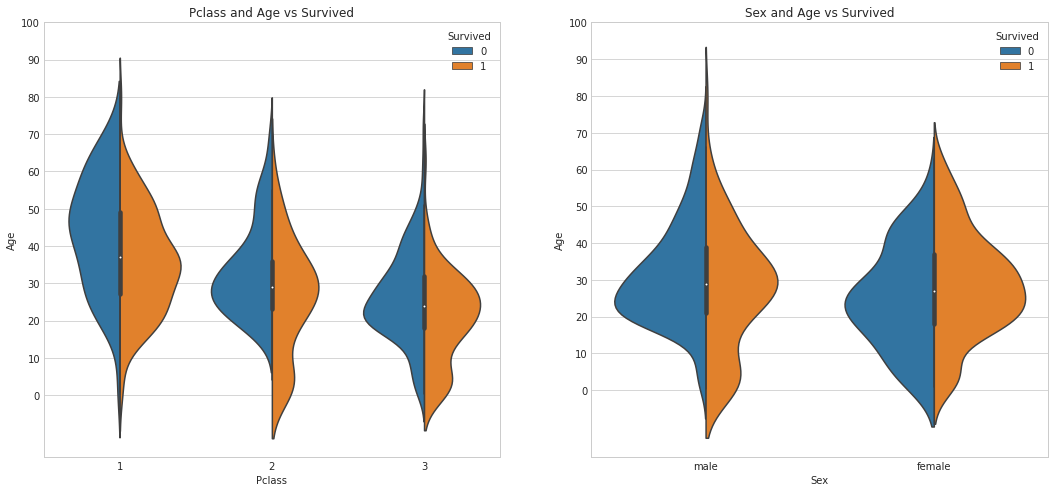

In [32]:
f, ax = plt.subplots(1,2,figsize=(18,8))

#"Pclass", "Age" 의  "Survived" 분포
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

#"Sex","Age" 의  "Survived" 분포
sns.violinplot("Sex","Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [33]:
temp.groupby('Initial').agg({'Age': ['mean', 'count']}) #이니셜 별 평균 연령 체크

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       37.005848   171
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [34]:
# 이니셜 별 평균 연령을 빈값에 넣어 봅니다.

# 이니셜 별 평균 나이
print("Age mean : {} ".format(temp.groupby('Initial')['Age'].mean()))
print("------------------------------------------------------------------")
# temp 이니셜 별 결측값 적용
temp = temp.reset_index(drop=True)
temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean())) # fillan : 결측값을 x.mean()
print("------------------------------------------------------------------")
# 기존 data Age null list
print(data.loc[data['Age'].isnull()][['Name']]) 
print("------------------------------------------------------------------")
temp.head(n=10)

#Name : Moran, Mr. James , Initial : Mr 의 결측값 32.252151 로 채워짐

Age mean : Initial
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         37.005848
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64 
------------------------------------------------------------------
------------------------------------------------------------------
                                Name
5                   Moran, Mr. James
17      Williams, Mr. Charles Eugene
19           Masselmani, Mrs. Fatima
26           Emir, Mr. Farred Chehab
28     O'Dwyer, Miss. Ellen "Nellie"
..                               ...
408  Riordan, Miss. Johanna Hannah""
410           Naughton, Miss. Hannah
413               Spector, Mr. Woolf
416              Ware, Mr. Frederick
417         Peter, Master. Michael J

[

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,Allen,4
5,6,0.0,3,"Moran, Mr. James",male,32.252151,0,0,330877,8.4583,NaN,Q,Mr,Moran,5
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr,McCarthy,6
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master,Palsson,7
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs,Johnson,8
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs,Nasser,9


In [35]:
#이니셜 정리
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
#temp.head(n=10)

temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)
temp.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,5,Cumings,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,5,Futrelle,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,2,Allen,4
5,6,0.0,3,"Moran, Mr. James",male,32.252151,0,0,330877,8.4583,NaN,Q,2,Moran,5
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,2,McCarthy,6
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4,Palsson,7
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,5,Johnson,8
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,5,Nasser,9


In [36]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)
#temp.head(n=10)
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [37]:
# Age 분류
temp['Agroup'] = 0

temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

#나이대별 100% 생존자 리스트
print(temp.loc[temp['Age'] < 1][['Name' , 'Age']])
print(temp.loc[temp['Age'] > 75.0][['Name' , 'Age']])

survpct('Agroup')

                                         Name   Age
78              Caldwell, Master. Alden Gates  0.83
305            Allison, Master. Hudson Trevor  0.92
469             Baclini, Miss. Helene Barbara  0.75
644                    Baclini, Miss. Eugenie  0.75
755                 Hamalainen, Master. Viljo  0.67
803           Thomas, Master. Assad Alexander  0.42
831           Richards, Master. George Sibley  0.83
1092  Danbom, Master. Gilbert Sigvard Emanuel  0.33
1141                    West, Miss. Barbara J  0.92
1172           Peacock, Master. Alfred Edward  0.75
1198                Aks, Master. Philip Frank  0.83
1245  Dean, Miss. Elizabeth Gladys Millvina""  0.17
                                                  Name   Age
630               Barkworth, Mr. Algernon Henry Wilson  80.0
987  Cavendish, Mrs. Tyrell William (Julia Florence...  76.0


Agroup
1     1.000000
2     0.565217
7     0.526316
13    0.500000
16    0.457143
18    0.318182
21    0.431818
24    0.363636
28    0.400000
31    0.459459
33    0.178808
36    0.552632
45    0.385827
60    0.320000
78    1.000000
Name: Survived, dtype: float64

In [38]:
# Sex 분류 : male(1) , female(2) , baby(3)
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [39]:
#SibSp : 형재 자매의 수/ 배우자 등이 승선한 경우 수
#Parch : 부모나 자식과 같이 탄 경우 수 

#혼자인 경우와 가족인 경우
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

#survpct('Family') #4명 인경우가 높은 생존률을 보임
#survpct('Alone')  #Family = 1
temp.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,Q,2,Moran,5,"(30.0, 32.252]",33,1.0,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,4,Palsson,7,"(0.169, 16.0]",2,NaN,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,S,5,Johnson,8,"(26.0, 30.0]",28,NaN,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,C,5,Nasser,9,"(0.169, 16.0]",13,NaN,2


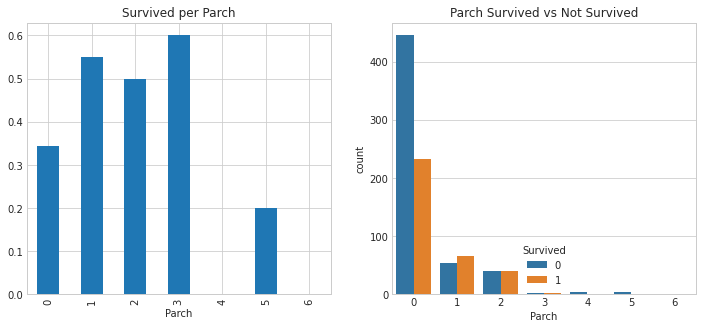

In [40]:
#Parch 별 생존률 , 생존/사망 수
bag('Parch', 'Survived', 'Survived per Parch', 'Parch Survived vs Not Survived')
#가족4명까지 생존률이 올라감 
#그 이상은 오히려 줄어듬

#temp.loc[(temp['Family'] == 5) & (temp['Survived'] == 1)]

In [41]:
pd.crosstab([temp.Family, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='summer_r')
#Pclass = 3 에 상대적으로 사람이 많음
#가족 수가 높을 수록 Pclass = 3에 승선한 경우가 높

In [42]:
temp.Ticket.head()
#temp.Ticket.isnull().any() # null 은 없음

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [43]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z0-9]+)')
temp = temp.reset_index(drop=True)  # 복사한 항목들을 사용하다보면 'ValueError: cannot reindex from a duplicate axis` 요런 에러가 나오는 경우가 많은데 이런 것은 요 코드로 리셋을 한 번 해주면 됩니다.
temp.head()
#temp.Initick.value_counts()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,373450


In [44]:
#Initick to Number
temp['NumTicket'] = temp['Initick'].factorize()[0]
temp.NumTicket.head(n=15)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12     0
13    12
14    13
Name: NumTicket, dtype: int64

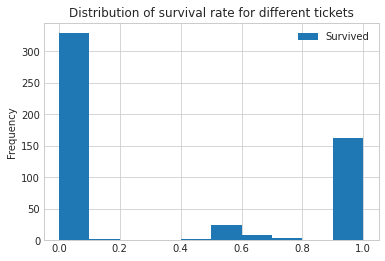

In [45]:
#temp.groupby('NumTicket')['Survived'].mean()
temp.groupby('NumTicket')['Survived'].mean().to_frame().plot(kind='hist')
plt.title('Distribution of survival rate for different tickets');

In [46]:
#요금(Fare) 
print('Highest Fare was:', temp['Fare'].max())
print('Lowest Fare was:', temp['Fare'].min())
print('Average Fare was:', temp['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.29547928134557


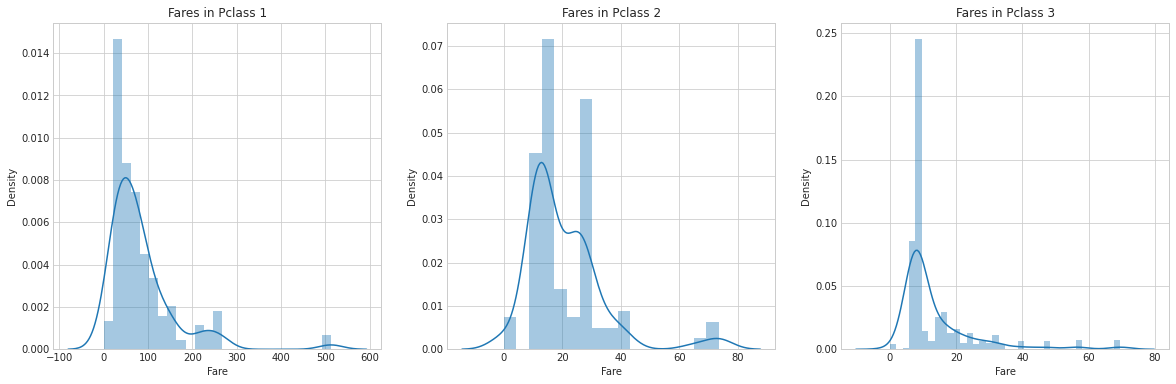

In [47]:
#객실(Pclass)별 요금(Fare)
f,ax=plt.subplots(1, 3, figsize=(20, 6))

#sns.distplot(train[train['Pclass'] == 1].Fare,ax=ax[0],kde=False)
sns.distplot(train[train['Pclass'] == 1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(train[train['Pclass'] == 2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(train[train['Pclass'] == 3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

#Pclass = 1 의 경우 값의 범주가 상대적으로 넓음(~600)

In [48]:
#Fare 그룹화
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fgroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,8
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803,3,8
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,2,Allen,4,"(33.0, 39.0]",36,1.0,1,373450,4,4


In [49]:
#Cabin(선실 번호)
print("cabin null cnt : {} ".format(temp.Cabin.isnull().sum()))

temp.Cabin.value_counts().head(10)

cabin null cnt : 1014 


C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
Name: Cabin, dtype: int64

In [50]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')

#temp.loc[temp['Pclass'].values == 1].groupby('Inicab')[['Inicab' , 'Pclass']].mean() # pclass(=1) inicab check : A,B,C,D,E,T
#temp.loc[temp['Pclass'].values == 2].groupby('Inicab')[['Inicab' , 'Pclass']].mean() # pclass(=2) inicab check : D,E,F
#temp.loc[temp['Pclass'].values == 3].groupby('Inicab')[['Inicab' , 'Pclass']].mean() # pclass(=3) inicab check : E,F,G

#Cabin Nan 값을 Pclass 별로 
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'

temp.Inicab.value_counts()


Z    693
Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: Inicab, dtype: int64

In [51]:
#Inicab to Number
temp['Inicab'] = temp['Inicab'].factorize()[0]
temp.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fgroup,Inicab
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,...,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,...,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,8,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,...,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,3,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,...,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803,3,8,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,...,Allen,4,"(33.0, 39.0]",36,1.0,1,373450,4,4,0
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,...,Moran,5,"(30.0, 32.252]",33,1.0,1,330877,5,4,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,...,McCarthy,6,"(48.0, 80.0]",60,1.0,1,17463,6,8,2
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,...,Palsson,7,"(0.169, 16.0]",2,NaN,5,349909,7,5,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,...,Johnson,8,"(26.0, 30.0]",28,NaN,3,347742,8,5,0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,...,Nasser,9,"(0.169, 16.0]",13,NaN,2,237736,9,7,3


In [52]:
#Embarked(승선한 항구) : C = Cherbourg, Q = Queenstown, S = Southampton

print(temp.groupby(['Embarked' , 'Pclass' , 'Sex'])['Survived'].mean())

pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap='summer_r')

Embarked  Pclass  Sex
C         1       1      0.404762
                  2      0.976744
          2       1      0.200000
                  2      1.000000
          3       1      0.214286
                  2      0.619048
                  3      1.000000
Q         1       1      0.000000
                  2      1.000000
          2       1      0.000000
                  2      1.000000
          3       1      0.076923
                  2      0.727273
S         1       1      0.346154
                  2      0.958333
                  3      1.000000
          2       1      0.127660
                  2      0.910448
                  3      1.000000
          3       1      0.128302
                  2      0.375000
                  3           NaN
Name: Survived, dtype: float64


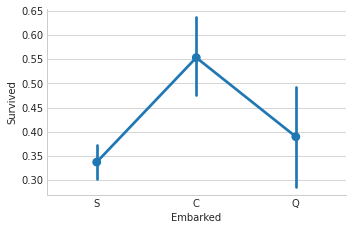

In [53]:
#승선 장소 별로 생존 확률
#Embarked = C 의 생존률이 가장 높음 , 0.55
sns.factorplot('Embarked', 'Survived', data=temp)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

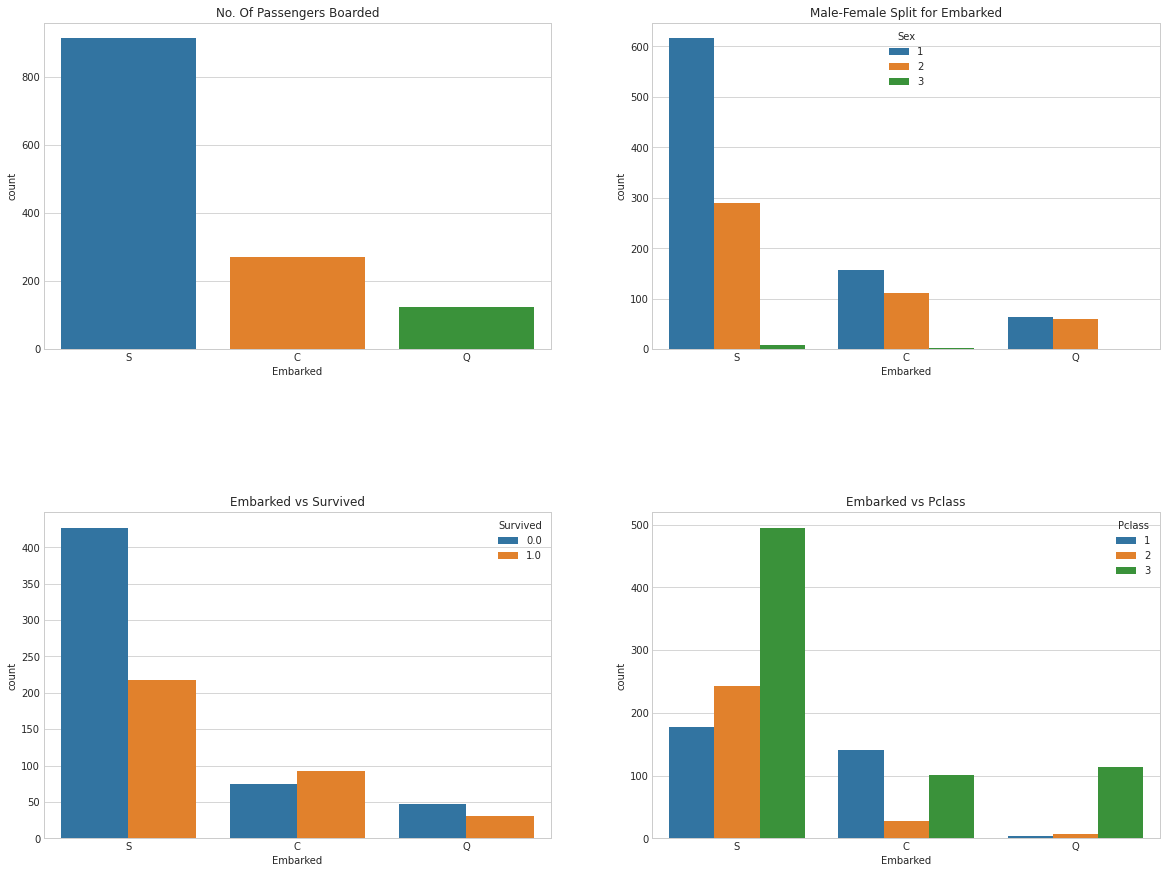

In [54]:
f,ax=plt.subplots(2,2,figsize=(20,15))

#S 항구에서 탄사람이 가장 많음
#C 항구에서 탄사람이 가장 적음
sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

#어느 항구에서든 남자(sex=1)가 높은 비중을 차지
sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

#C 항구에서 유일하게 생존자의 비중이 더 높음
sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

#C 항구에서 Pclass = 1 의 비중이 높음
#Q 항구에서 Pclass = 3 의 비중이 높음
sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [55]:
#Embarked=Nan은 2개 , ticket 번호 = 113572
print(temp.loc[(temp.Embarked.isnull())][['Ticket' , 'Embarked']])

print("------------------------------------------------------------")

#ticket = 113572 는 2개뿐
print(temp.loc[(temp.Ticket == '113572')][['Ticket' , 'Embarked']])

print("------------------------------------------------------------")

#앞 뒤로 Embarked = S , Pclass = 1 높은 확률로 S = Southampton 일 수 있음... 
temp.sort_values(['Ticket'], ascending = True)[55:70][['Pclass' , 'Ticket' , 'Embarked']]

     Ticket Embarked
61   113572      NaN
829  113572      NaN
------------------------------------------------------------
     Ticket Embarked
61   113572      NaN
829  113572      NaN
------------------------------------------------------------


,Pclass,Ticket,Embarked
54,1,113509,C
351,1,113510,S
252,1,113514,S
829,1,113572,NaN
61,1,113572,NaN
802,1,113760,S
390,1,113760,S
435,1,113760,S
763,1,113760,S
185,1,113767,S


In [56]:
#Embarked=Nan 을 S = Southampton 
temp.loc[(temp.Embarked.isnull()), 'Embarked'] = 'S'

#Embarked Null Check
temp.Embarked.isnull().value_counts()

False    1309
Name: Embarked, dtype: int64

In [57]:
#Embarked to Number
temp['Embarked'] = temp['Embarked'].factorize()[0]
    
temp[['Embarked']].value_counts()

Embarked
0           916
1           270
2           123
dtype: int64

# **새로운 항목**

* Priority - Nobles, Women in Pclass 1 & 2, Babies under 1, Kids under 17 in Pclass 1 & 2, higher fare, Women in Pclass 3 and so on

* FH - Female Higher Survival Group

* MH - Male Higher Survival Group

* FL - Female Lower Surival Group

* ML - Male Lower Survival Group

In [58]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [59]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [60]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [61]:
survpct('Age').head(n=20)

Age
0.170000          NaN
0.330000          NaN
0.420000     1.000000
0.670000     1.000000
0.750000     1.000000
0.830000     1.000000
0.920000     1.000000
1.000000     0.714286
2.000000     0.300000
3.000000     0.833333
4.000000     0.700000
5.000000     1.000000
5.482642     0.500000
6.000000     0.666667
7.000000     0.333333
8.000000     0.500000
9.000000     0.250000
10.000000    0.000000
11.000000    0.250000
11.500000         NaN
Name: Survived, dtype: float64

In [62]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

**Initial 범주**

* temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)

**Agroup 범주**

* temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
* temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
* temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
* temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
* temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
* temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
* temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
* temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
* temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
* temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
* temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
* temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
* temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
* temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
* temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

**Fgroup 범주**

* temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
* temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
* temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
* temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
* temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
* temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
* temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
* temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
* temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
* temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9


In [63]:
temp['Priority'] = 0
temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1), 'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

print(temp.Priority.value_counts())

survpct('Priority')

0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: Priority, dtype: int64


Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [64]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [65]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [66]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

print(temp.FH.value_counts())

survpct('FH')

0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64


FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [67]:
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2), 'MH'] = 0
temp.loc[(temp['Sex'] == 1), 'MH'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8

print(temp.MH.value_counts())

survpct('MH')

0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: MH, dtype: int64


MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [68]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

print(temp.FL.value_counts())

survpct('FL')

0    847
2    225
6    100
4     94
5     41
1      2
Name: FL, dtype: int64


FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64

In [69]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

print(temp.ML.value_counts())

survpct('ML')

0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: ML, dtype: int64


ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

* Priority - Nobles, Women in Pclass 1 & 2, Babies under 1, Kids under 17 in Pclass 1 & 2, higher fare, Women in Pclass 3 and so on
* FH - Female Higher Survival Group
* MH - Male Higher Survival Group
* FL - Female Lower Surival Group
* ML - Male Lower Survival Group
* Init - 이름분류 그룹
* Fgroup - Fare를 그룹화
* NumName - LastName 펙토라이징
* NumTicket - 티켓명 펙토라이징
* Family -  sibsp(형재 자매의 수/ 배우자 등이 승선한 경우 수) + parch(부모나 자식과 같이 탄 경우 수)
* Embarked =  승선한 항구 펙토라이징
* Sex - 성별 펙토라이징
* Pclass - 선실 등급 펙토라이징

In [70]:
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10'] = temp['Family']
temp['F11'] = temp['Embarked']
temp['F12'] = temp['Sex']
temp['F13'] = temp['Pclass']

In [71]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [72]:
dfl = pd.DataFrame() # for label encoding

In [73]:
good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13']
dfl[good_columns] = temp[good_columns]
dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,8,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,8,0,2,0,5,8,3,3,2,0,2,1
4,0,0,1,0,6,2,4,4,4,1,0,1,3


**Label Encoding**
순서대로 번호붙이기

In [74]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)
              
print(dfl['F13'].value_counts())
print("------------------------------------------------------------")
print(dfl_enc['F13'].value_counts())

dfl_enc.head()

3    709
1    323
2    277
Name: F13, dtype: int64
------------------------------------------------------------
2    709
0    323
1    277
Name: F13, dtype: int64


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,1,2,0,0,1,0,0,2
1,2,5,0,2,0,4,8,1,1,1,1,1,0
2,0,4,0,5,0,3,3,2,2,0,0,1,2
3,2,5,0,2,0,4,8,3,3,1,0,1,0
4,0,0,1,0,6,1,4,4,4,0,0,0,2


**One Hot Encoding**
해당되면 1 , 비해당 0

In [75]:
dfh = dfl.copy()

one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)

print(dfl['F13'].value_counts())
print("------------------------------------------------------------")
print(dfh_enc['F13_1'].value_counts())

dfh_enc.head()

3    709
1    323
2    277
Name: F13, dtype: int64
------------------------------------------------------------
0    986
1    323
Name: F13_1, dtype: int64


,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,...,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


# 모델생성

In [76]:
print("train data cnt : {} ".format(ntrain))

#dfh_enc (one hot encoding)을 train , test 데이터로 분리
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

train data cnt : 891 


In [77]:
X_test = test
X_train = train

- 분석시에 변수들이 너무 스케일이 다를 경우
- Data Standardization이란 feature를 리스케일링 하여 feature의 평균이(mean) 0 분산이(variance) 1이 되게 만들어주는 과정
- Standardization의 궁극적인 목표는 모든 feature들을 공통의 척도로 변경해 주는 것 , 값의 범위의 차이를 왜곡하지 않으면서 모든 feature를 공통의 척도로 스케일을 해주는 것
    - 나이, 연봉 을 기준으로 작업 시 나이는 연봉에 비해 값의 크기-범위가 다르므로 결과에 영향을 줌
    
    <img src="https://blog.kakaocdn.net/dn/blLXhB/btqVnYzUOLC/lvBFaA7WqblnNZYR6vSAh1/img.png" width="20%" height="20%">

- fit_transform
    - fit_transform()은 train dataset에 사용
    - 학습모델은 train data의 mean과 variance를 학습
    - 학습된 scaler의 parameter는 test data를 scale 하는데 사용
        - train data로 학습된 scaler의 parameter를 통해 test data의 feature를 스케일
        
    
- transform
    - train data로부터 학습된 mean , variance값을 test data에 적용
    
    
- ref
    - standard scaler : chapter09 (05:43)
    - https://deepinsight.tistory.com/165
    - https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

용어정리

- Decision Tree
    - 의사결정나무는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합
    
    <img src="http://i.imgur.com/ZKDnzOB.png" width="20%" height="20%">
 
 
- Bootstrapped dataset
    - original dataset에서 original dataset과 같은 사이즈로 무작위로 샘플을 뽑은 데이터셋
    - 중요한 점은 샘플을 뽑을 때 중복을 허락하는 것(복원추출) , 같은 샘플이 여러번 들어갈 수 있
    - 부트스트랩 데이터셋를 이용해 학습시킨 모델을 기본 모델(weak learner)라고 이 기본 모델들을 이용해서 앙상블 방법을 적용
        - Weak learner : 무작위로 선정하는 것보다는 성공 확률이 높은, 즉 오차율이 50% 이하인 학습 규칙
    
    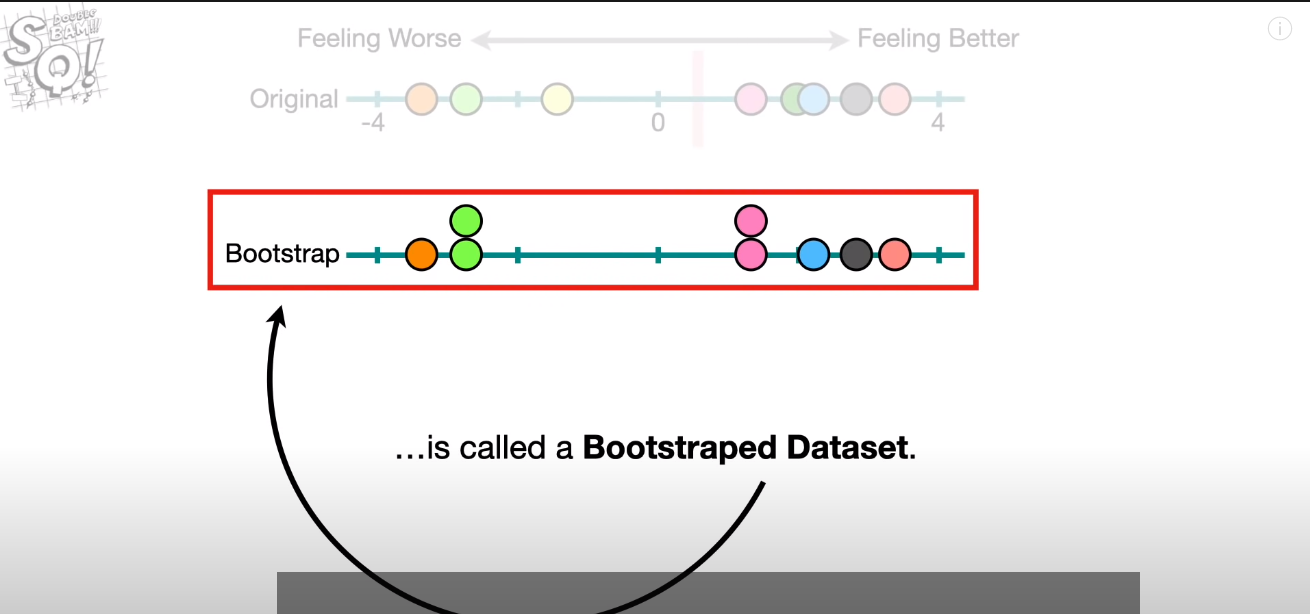
    
   
- Bootstrap Aggregating(Bagging)
    - 랜덤 포레스트는 제일 먼저 bagging 이라는 과정을 거칩니다. Bagging은 트리를 만들 때 training set의 부분집합을 활용하여 형성하는 것
    
    <img src="https://miro.medium.com/max/1678/1*Wf91XObaX2zwow7mMwDmGw.png" width="20%" height="20%">
 
 
- Random Forest
    - 여러개의 decision tree를 형성하고 새로운 데이터 포인트를 각 트리에 동시에 통과시키며, 각 트리가 분류한 결과에서 투표를 실시하여 가장 많이 득표한 결과를 최종 분류 결과로 선택합니다.
    
    <img src="https://itwiki.kr/images/thumb/1/12/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.png/500px-%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.png" width="20%" height="20%">


- Extremely Randomized Trees(Extra Tree)
    -  랜덤 포레스트와 엑스트라 트리의 차이점은 부트스트랩 샘플(중복된 훈련 샘플)을 사용하지 않는다
    -  각 결정 트리를 만들어낼 때 전체 훈련 세트를 사용한다는 것인데, 이는 분할할 때 가장 좋은 분할을 찾는 것이 아닌, 무작위(Random)로 분할한다는 뜻
    -  데이터 샘플 개수와 특성을 설정하는 것까지 무작위성을 주입
    

- K Near Neighbors(KNN)
    - 새로운 데이터가 입력되었을 때, 기존 데이터와 비교하여 가장 인업한 데이터 k개 선정, k값에 의해 결정된 분류를 입력된 데이터로 분류
    
        <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcvzGSE%2Fbtqw569xJ8n%2FDfckialHS6fgKmDZpy4L01%2Fimg.png" width="20%" height="20%">


- Regression
    - y=f(x)에서 연속형 변수 y를 y의 원인이라고 추정되는 x와의 관계를 통해 추정
    - Supervised Learning중 하나로 input data로 discrete한 값을 예측하면 Classification, continuous한 값을 예측하면 Regression
   
   
- Linear Regression
    - Linear Regression은 input data에 따른 output data의 관계를 1차원 방정식으로 구하는 것
    
    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVAVEJ%2FbtqAXnOlJTl%2FQsCo5QpyLCiHVo3ShUXYvK%2Fimg.png" width="20%" height="20%">


- Logistic Regression
    - Linear Regression에 non-linear 특성을 추가
    - input과 output data 관계를 곡선으로 fitting하기 위해 linear regression에서의 hypothesis에 sigmoid 활성함수를 추가
    - 범주형 종속 변수의 확률 예측 시 사용
    - Linear Regression과 같이 선형분석이 안되는 경우(단일 항목이 아닌, 여러 항목인 경우)
    
    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdayZdq%2FbtqA0O4PhVx%2F4Zr5E7JXbQCQh9QzQ2csJ0%2Fimg.png" width="20%" height="20%">


- Boosting
     - 부스팅은 머신러닝 앙상블 기법 중 하나로 sequential한 weak learner들을 여러 개 결합하여 예측 혹은 분류 성능을 높이는 알고리즘


- Ensemble
     - 여러개의 learner를 합하여 더 좋은 결과를 추출


- Gradient Boostring(GBM)
     - Sequential 한 weak learner들을 residual(잔차)을 줄이는 방향으로 결합하여 object function과의 loss를 줄여나가는 아이디어
  
  
- XGBoost(XGB)
     - GBM은 residaul을 줄이는 방향으로 weak learner를 결합해 강력한 성능을 자랑
     - 해당 train data에 residual을 계속 줄이니까 overfitting 되기 쉽다는 문제점이 있다
     - 이를 해결하기 위해 XGBoost는 GBM에 regularization term을 추가한 알고리즘
         - "Cost를 줄이는것이 특정 Parameter를 엄청 크게 만들어주면서 에러를 줄인다면 그것은 하지 않겠다!" 라고 하는것이 위의 Regularization term의 역할이자 의미


- Support Vector Classifier(SVC)
     - 마진을 허용한 분류 알고리즘
     - 서포트 벡터 머신(이하 SVM)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행


- Adaboost)
     - adaptive + boosting
     - 약한 분류기(weak classifier)들이 상호보완 하도록 순차적(sequential)으로 학습하고, 이들을 조합하여 최종적으로 강한 분류기(strong classifier)의 성능을 향상

     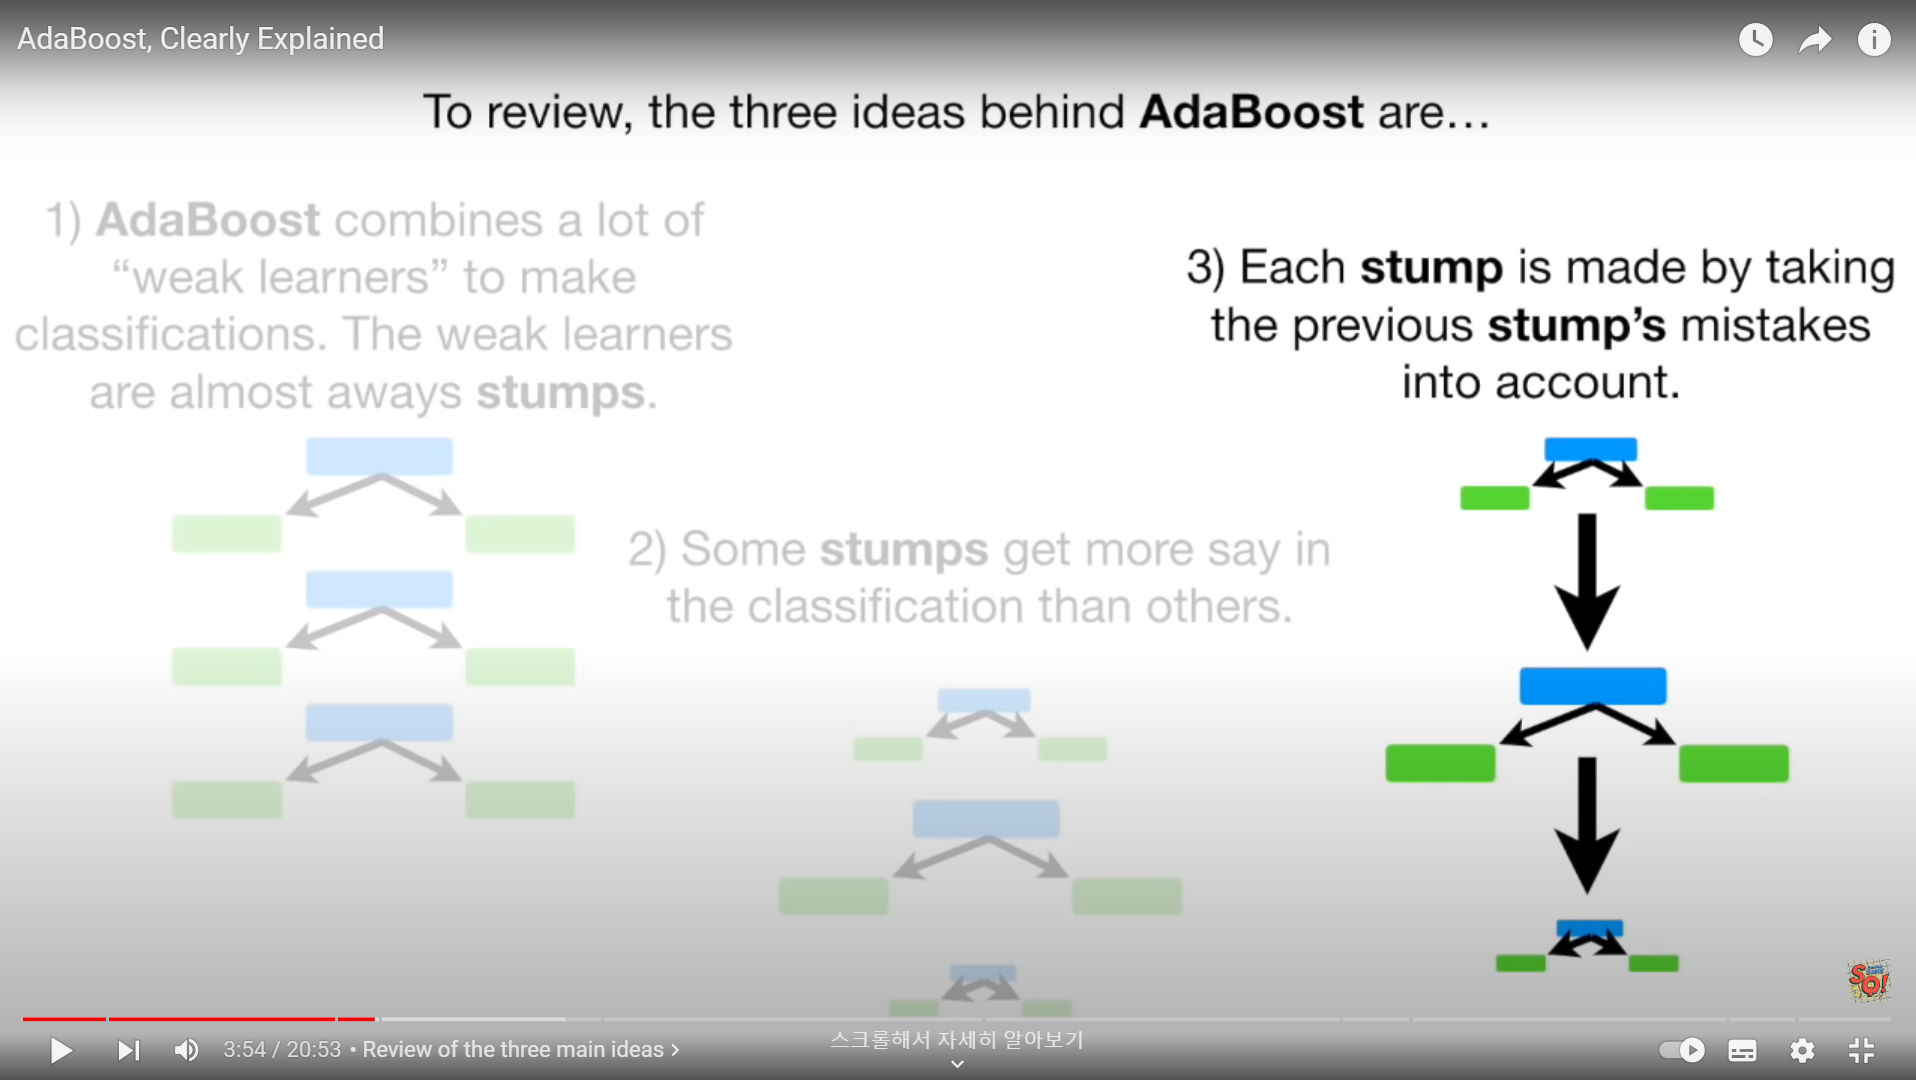



- Naive bayes)
     - scikit-learn에 구현된 나이브 베이즈 분류기는 GaussianNB, BernoulliNB, MultinomialNB 이렇게 세 가지
     - GaussianNB는 연속적인 어떤 데이터에도 적용할 수 있고 BernoulliNB는 이진 데이터를, MultinomialNB는 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예를 들면 문장에 나타난 단어의 횟수입니다)에 적용


- References)
    -  ML Basic)      https://ganghee-lee.tistory.com/23
    -  Decision Tree) https://ratsgo.github.io/machine%20learning/2017/03/26/tree/
    -  Random Forest) https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/
    -  Random Forest) https://itwiki.kr/w/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8
    -  Random Forest) https://soranhan.tistory.com/17
    -  Random Forest) https://youtu.be/J4Wdy0Wc_xQ
    -  Extra Tree)    https://itstory1592.tistory.com/16
    -  Extra Tree)    https://wyatt37.tistory.com/6
    -  KNN)           https://muzukphysics.tistory.com/entry/ML-7-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-k-Nearest-Neighbors-kNN-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%9E%A5%EC%A0%90-%EB%8B%A8%EC%A0%90
    -  KNN)           https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-6-K-%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83KNN
    -  Linear Regression , Logistic Regression) https://ganghee-lee.tistory.com/29
    -  Boostring , GBM , XGB) https://hyunlee103.tistory.com/25 , https://hichoe95.tistory.com/55
    -  Boostring) https://youtu.be/Xz0x-8-cgaQ
    -  SVC) https://hleecaster.com/ml-svm-concept/
    -  Adaboost) https://pro-jy.tistory.com/25 , https://youtu.be/LsK-xG1cLYA
    -  Naive Bayes)  https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-4-%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98%EA%B8%B0/
    -  Weak Learner) https://unsolvedproblem.github.io/laon/2019/01/23/laon_machine_learning_study_week1-2.html

In [79]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

# 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    #mod : 분류알고리즘 , xtrain : feature 데이터 세트 , ytrain : 레이블 데이터 세트 , scoring : 예측성능평가지표 , cv : 교차 검증폴드  , ref : https://guru.tistory.com/36
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10) 
    scores[model_names[ind]] = acc

In [80]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df

,0,1,2,3,4,5,6,7,8,9,mean
Random Forest,0.811111,0.898876,0.764045,0.898876,0.898876,0.842697,0.853933,0.775281,0.876404,0.842697,0.846280
Extra Trees,0.811111,0.898876,0.764045,0.887640,0.898876,0.865169,0.842697,0.775281,0.887640,0.831461,0.846280
Bagging Classifier,0.822222,0.831461,0.786517,0.898876,0.887640,0.853933,0.831461,0.775281,0.842697,0.842697,0.837278
Logistic Regression,0.833333,0.887640,0.786517,0.887640,0.865169,0.820225,0.831461,0.775281,0.865169,0.820225,0.837266
Gradient Boosting,0.833333,0.831461,0.764045,0.887640,0.865169,0.820225,0.842697,0.797753,0.831461,0.831461,0.830524
AdaBoost,0.811111,0.820225,0.764045,0.876404,0.853933,0.797753,0.842697,0.797753,0.831461,0.831461,0.822684
SVC,0.800000,0.808989,0.786517,0.876404,0.853933,0.808989,0.831461,0.764045,0.853933,0.808989,0.819326
XGBoost,0.777778,0.820225,0.719101,0.887640,0.842697,0.853933,0.820225,0.775281,0.842697,0.831461,0.817104
K Nearest Neighbour,0.700000,0.662921,0.640449,0.662921,0.752809,0.730337,0.752809,0.775281,0.808989,0.752809,0.723933
Gaussian Process,0.633333,0.606742,0.707865,0.719101,0.685393,0.764045,0.674157,0.719101,0.752809,0.741573,0.700412


,0,1,2,3,4,5,6,7,8,9
Random Forest,0.811111,0.898876,0.764045,0.898876,0.898876,0.842697,0.853933,0.775281,0.876404,0.842697
Extra Trees,0.811111,0.898876,0.764045,0.887640,0.898876,0.865169,0.842697,0.775281,0.887640,0.831461
Bagging Classifier,0.822222,0.831461,0.786517,0.898876,0.887640,0.853933,0.831461,0.775281,0.842697,0.842697
Logistic Regression,0.833333,0.887640,0.786517,0.887640,0.865169,0.820225,0.831461,0.775281,0.865169,0.820225
Gradient Boosting,0.833333,0.831461,0.764045,0.887640,0.865169,0.820225,0.842697,0.797753,0.831461,0.831461
AdaBoost,0.811111,0.820225,0.764045,0.876404,0.853933,0.797753,0.842697,0.797753,0.831461,0.831461
SVC,0.800000,0.808989,0.786517,0.876404,0.853933,0.808989,0.831461,0.764045,0.853933,0.808989
XGBoost,0.777778,0.820225,0.719101,0.887640,0.842697,0.853933,0.820225,0.775281,0.842697,0.831461
K Nearest Neighbour,0.700000,0.662921,0.640449,0.662921,0.752809,0.730337,0.752809,0.775281,0.808989,0.752809
Gaussian Process,0.633333,0.606742,0.707865,0.719101,0.685393,0.764045,0.674157,0.719101,0.752809,0.741573


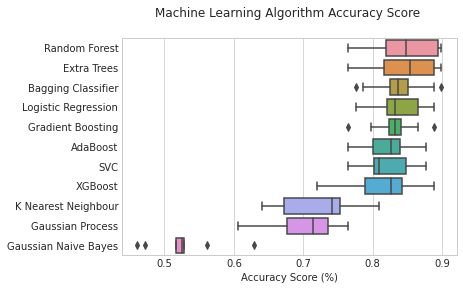

In [81]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');
result_df.head(11)

In [82]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

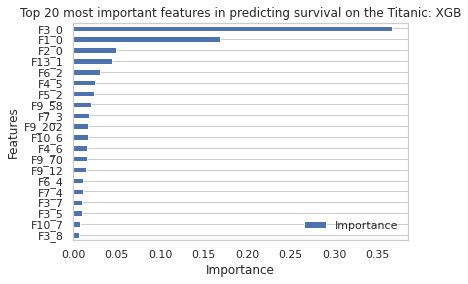

In [83]:
#XGB, 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

# 그래프 제목
title = 'Top 20 most important features in predicting survival on the Titanic: XGB'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [84]:
print(xgb.feature_importances_.shape)
print(log.coef_[0].shape)
print(np.transpose(log.coef_[0]).shape)


(1648,)
(1648,)
(1648,)


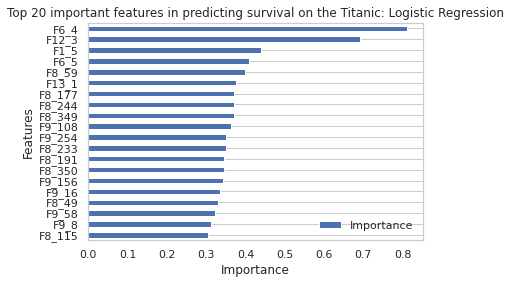

In [85]:
#Logistic regression, 데이터 프레임에 항목 중요도를 넣습니다.
#Logistic regression에서는 중요도보다 coefficients를 사용합니다. 
#fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])} #Features라는 열에 트레인의 열들의 이름을 리스트로 만들어서 넣고 Importance에는 Logistic regression에는 coefficient를 바꾸어 넣어라는 넘파이 명령입니다.(즉 가로를 세로로)
fi = {'Features':train.columns.tolist(), 'Importance':log.coef_[0]}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: Logistic Regression'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

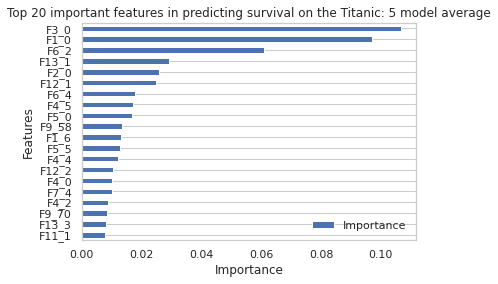

In [86]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')
#print(importances)

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)
#print(importances)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)
#print(importances)

# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: 5 model average'

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [87]:
# total cnt : 1648
#importance.count()

# 0 < importance cnt : 1254
#importance.loc[(importance['Importance'] > 0)].count()

# 일부 중요 importance만 추출 , 380개
importance1 = importance[-381:]
importance1[371:381]

# 380개 인덱스 추출
mylist = list(importance1.index)
#mylist[:10]

# 영양가 있는 380개만 넣기
train1 = pd.DataFrame()
test1 = pd.DataFrame()

for i in mylist:
    train1[i] = train[i]
    test1[i]= test[i]
    
train1.head()

,F8_383,F9_385,F8_252,F9_283,F8_361,F8_96,F9_340,F8_529,F9_308,F1_1,...,F9_58,F5_0,F4_5,F6_4,F12_1,F2_0,F13_1,F6_2,F1_0,F3_0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,0


In [88]:
train = train1
test = test1

# 모델의 변수를 다시 정의하고
X_train = train
X_test = test

print("X_train :: cnt : {} ".format(X_train.count()))
print("X_test  :: cnt : {} ".format(X_test.count()))

# 바꿉니다.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train :: cnt : F8_383    891
F9_385    891
F8_252    891
F9_283    891
F8_361    891
         ... 
F2_0      891
F13_1     891
F6_2      891
F1_0      891
F3_0      891
Length: 381, dtype: int64 
X_test  :: cnt : F8_383    418
F9_385    418
F8_252    418
F9_283    418
F8_361    418
         ... 
F2_0      418
F13_1     418
F6_2      418
F1_0      418
F3_0      418
Length: 381, dtype: int64 


In [89]:
#scikit learn에서 사용하는 random_state 인자는 수행시마다 동일한 결과를 얻기 위해 적용
#random 함수의 seed 값을 고정시키기 때문에 여러번 수행하더라도 같은 레코드를 추출 , https://www.inflearn.com/questions/110501

ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores2 = {}

# 학습 및 교차 검증
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores2[model_names[ind]] = acc

,0,1,2,3,4,5,6,7,8,9
SVC,0.966667,0.876404,0.887640,0.898876,0.921348,0.910112,0.865169,0.921348,0.921348,0.932584
Gaussian Process,0.877778,0.865169,0.820225,0.887640,0.887640,0.820225,0.842697,0.842697,0.910112,0.853933
Extra Trees,0.844444,0.910112,0.764045,0.910112,0.887640,0.853933,0.842697,0.797753,0.865169,0.842697
Logistic Regression,0.844444,0.887640,0.797753,0.887640,0.887640,0.820225,0.820225,0.797753,0.887640,0.831461
Random Forest,0.844444,0.887640,0.764045,0.898876,0.887640,0.853933,0.831461,0.764045,0.876404,0.831461
Bagging Classifier,0.855556,0.876404,0.730337,0.887640,0.876404,0.853933,0.865169,0.764045,0.842697,0.831461
Gradient Boosting,0.822222,0.831461,0.764045,0.887640,0.865169,0.820225,0.842697,0.797753,0.831461,0.831461
XGBoost,0.777778,0.831461,0.719101,0.887640,0.842697,0.853933,0.820225,0.775281,0.842697,0.831461
AdaBoost,0.800000,0.808989,0.764045,0.865169,0.853933,0.786517,0.820225,0.797753,0.842697,0.831461
K Nearest Neighbour,0.788889,0.831461,0.775281,0.853933,0.853933,0.786517,0.808989,0.764045,0.853933,0.808989


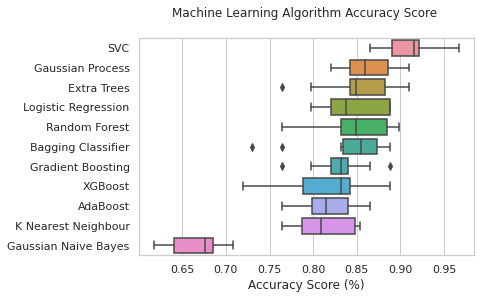

In [90]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df = result_df.drop(['mean'], axis=1)

sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

result_df.head(11)

# **하이퍼 파리미터 튜닝**

- Scikit-Learn에서는 3가지 모형 최적화 도구를 지원하는데 validation_curve/ GridSearchCV/ ParameterGrid
- fit 메소드를 호출하면 grid search가 자동으로 여러개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾는다.
- bestscore는 최고 점수이고 best estimator는 최고 점수를 낸 파라미터를 가진 모형

**svc 하이퍼 파라미터 튜닝**
- c값과 gamma값은 10의 배수로 일반적으로 한다.
- 감마 매개 변수는 단일 학습 예제의 영향이 도달하는 정도를 정의 
    - 낮은 값은 'far'를, 높은 값은 'close'를 나타냅니다.
- C 매개 변수는 의사 결정 표면의 단순성에 대한 훈련 예제의 오 분류를 제거
    - C가 낮을수록 결정 표면이 매끄럽고 높은 C는 모델이 더 많은 샘플을 서포트 벡터로 자유롭게 선택할 수 있도록하여 모든 학습 예제를 올바르게 분류하는 것을 목표로합니다.
- Verbose는 불리안 값으로 True로 넣으면 꼬치 꼬치 다 알려주는데, 대신 시간이 좀 더 오래 걸립니다.
- cv =5는 5 fold로 교차 검증한다는 뜻입니다.

In [91]:
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma' : gammas}

# 교차검증
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.9001004331178205
{'C': 1, 'gamma': 0.001}


**gradient boosing classifier 하이퍼 파라미터 튜닝**
- learning_rate는 각 트리의 기여를 줄이는 역할을 합니다.
- n_estimator는 각 경우의 트리 숫자입니다.

In [92]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.8461929571276128
{'learning_rate': 0.5, 'n_estimators': 2000}


**Logistic regression 하이퍼 파라미터 튜닝**
- Penalty - L1 을 사용하는 회귀 모델을 Lasso Regression, L2를 사용하는 모델을 Ridge Regression
    - 주요 차이점은 페널티 , 릿지 회귀는 손실 함수에 페널티 항으로 계수의 "제곱 크기"를 추가
- C는 estimator 입니다. logspace 1차원 10개 배열로 0에서 4까지를 estimator로 놓은 것

In [93]:
#np.logspace(1,10,num = 10, base = 2)
np.logspace(0, 4, 10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [94]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=False, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

0.8450881928315862
{'C': 59.94842503189409, 'penalty': 'l2'}
